# Assignment 5 
> Dominik Huffield <br>
CS 533 <br>


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics

In [2]:
articles = pd.DataFrame.from_records(
    ((f.parent.name, f.name, f.read_text(encoding='latin1'))
     for f in Path('bbc').glob('*/*.txt')),
    columns=['category', 'file', 'text']
)

In [3]:
articles.groupby('category')['file'].count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: file, dtype: int64

**The distribution of each categorty represented numerically**

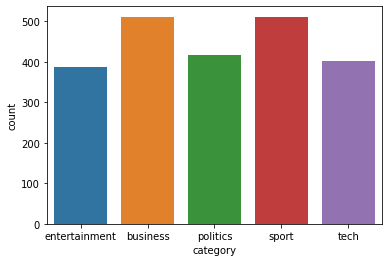

In [4]:
sns.countplot(x=articles['category'])

**The distribution of each categorty represented graphically**

In [5]:
category_dict = {'business':0, 'entertainment':1, 'politics':2, 'sport':3, 'tech':4}
articles['category_id'] = articles['category'].map(category_dict)
articles.head()

,category,file,text,category_id
0,entertainment,318.txt,Roxy Music on Isle of Wight bill\n\nRoxy Music...,1
1,entertainment,157.txt,US charity anthem is re-released\n\nWe Are The...,1
2,entertainment,291.txt,U2 stars enter rock Hall of Fame\n\nSinger Bru...,1
3,entertainment,240.txt,Elvis 'set for chart hat-trick'\n\nThe late US...,1
4,entertainment,186.txt,Johnny and Denise lose Passport\n\nJohnny Vaug...,1


In [6]:
X = articles['text']
y = articles['category_id']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Splitting into train and test sets having 20% sample test size

In [8]:
count_vect = CountVectorizer(stop_words='english')
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

In [9]:
tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_tfi = tfidf_vect.fit_transform(X_train)
X_test_tfi = tfidf_vect.transform(X_test)

pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names()).head()

,00,000,0001,000bn,000m,000th,001,001and,001st,004,...,zonealarm,zones,zoom,zooms,zooropa,zornotza,zorro,zuluaga,zurich,zvonareva
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.011371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Part 2: Classification

>Taining a model using Naive Bayes using Count Vectorization as data

In [10]:
nb_mod = MultinomialNB()
%time nb_mod.fit(X_train_count, y_train)

CPU times: user 27.3 ms, sys: 558 µs, total: 27.9 ms
Wall time: 10.4 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
y_pred_nb = nb_mod.predict(X_train_count)
metrics.accuracy_score(y_train, y_pred_nb)

0.994943820224719

In [12]:
y_pred_nb = nb_mod.predict(X_test_count)
metrics.accuracy_score(y_test, y_pred_nb)

0.9820224719101124

>Taining a model using KNeighborsClassifier using TfidfVectorization as data

In [13]:
kn_mod = KNeighborsClassifier(n_neighbors=5)
%time kn_mod.fit(X_train_tfi, y_train)

CPU times: user 18.6 ms, sys: 2.48 ms, total: 21.1 ms
Wall time: 1.63 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred_kn = kn_mod.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kn)

0.9617977528089887

In [15]:
y_pred_kn = kn_mod.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kn)

0.9370786516853933

### Part 3: Clustering

<br>

>Building Kmeans model with 5 clusters

In [16]:
kmeans = KMeans(n_clusters=5, random_state=2)
%time kmeans.fit(X_train_tfi, y_train)

CPU times: user 17min 23s, sys: 31.7 s, total: 17min 55s
Wall time: 58.2 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [17]:
y_pred_kmn = kmeans.predict(X_train_tfi)
metrics.accuracy_score(y_train, y_pred_kmn)

0.17359550561797754

In [18]:
y_pred_kmn = kmeans.predict(X_test_tfi)
metrics.accuracy_score(y_test, y_pred_kmn)

0.1707865168539326

In [19]:
ivd = {v: k for k, v in category_dict.items()}
kmn_df = pd.DataFrame(y_pred_kmn, columns=['pred_label'], index=y_test.index)

kmn_df['label'] = y_test

kmn_df['pred_label'].replace(ivd, inplace=True)
kmn_df['label'].replace(ivd, inplace=True)

kmn_df.head()

,pred_label,label
1418,business,sport
559,tech,business
1697,business,sport
514,tech,business
972,sport,politics


In [20]:
km_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km_centroids.sum(axis=1)

business          8.800660
entertainment     9.042317
politics          9.887031
sport            10.006299
tech              8.859707
dtype: float64

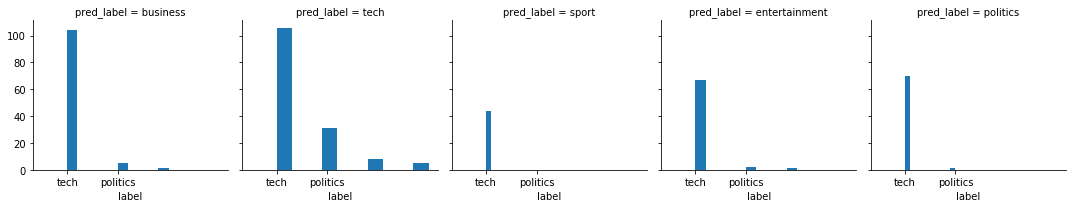

In [21]:
g = sns.FacetGrid(kmn_df, col="pred_label",sharex=True)
g.map(plt.hist, 'label')

**3. Did the clustering do a good job of finding the categories?** <br>
<br>


>Now for a model using 6 clusters

In [22]:
kmeans2 = KMeans(n_clusters=6, random_state=2)
%time kmeans2.fit(X_train_tfi, y_train)

CPU times: user 12min 54s, sys: 23 s, total: 13min 17s
Wall time: 42.7 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [23]:
y2_pred_kmn = kmeans2.predict(X_test_tfi)
metrics.accuracy_score(y_test, y2_pred_kmn)

0.24719101123595505

In [24]:
km2_centroids = pd.DataFrame(kmeans2.cluster_centers_, columns=tfidf_vect.get_feature_names()).rename(index=ivd)
# km2_centroids.sort(axis=1, inplace=True)
km2_centroids.sum(axis=1)

business          8.880064
entertainment    10.276032
politics         10.106525
sport             9.266280
tech              9.168881
5                 8.789669
dtype: float64

In [25]:
df = pd.DataFrame(X_train_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_train.index)
df2 = pd.DataFrame(X_test_tfi.toarray(), columns=tfidf_vect.get_feature_names(), index=y_test.index)

df = df.append(df2)
df.sort_index(inplace=True)

df['label'] = articles['category']
# df['label'].replace(ivd, inplace=True)

df = pd.DataFrame(df.groupby('label').sum())

for c in df.index:
    x = df.loc[c].to_numpy()
    m = df.drop(index=[c]).sum()
    x = pd.Series(x-m, name=c)
    print(x.nlargest(5))
    print('\n')


growth     12.645849
bank       12.126550
oil        11.884104
economy    11.116485
shares     10.666876
Name: business, dtype: float64


film        24.959422
band         9.261734
awards       8.878575
festival     8.702468
album        8.483741
Name: entertainment, dtype: float64


labour      23.543405
blair       20.011809
election    18.852719
party       17.068857
brown       11.280124
Name: politics, dtype: float64


cup        12.307153
england    11.321589
match      10.797226
injury     10.261450
chelsea     9.700110
Name: sport, dtype: float64


mobile        12.769704
software      12.006862
users         11.889450
technology    10.635331
microsoft      9.905015
Name: tech, dtype: float64




The top 5 tokens for each category where the value of the frequency of a token in one category minus sum of frequency of that same token in other category is maximized. This gives the most important features for our classifier.

### Extra Credit

In [27]:
svd = TruncatedSVD(n_components=8)